In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt


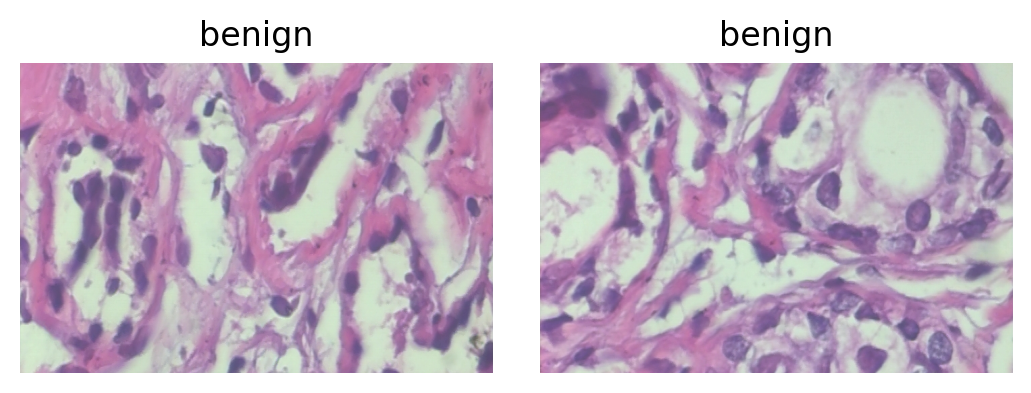

In [3]:
def show_images(image_dir):
    folder_name = os.path.basename(image_dir)
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, dpi=200)

    # Loop through the image files and display them in subplots
    for i, image_file in enumerate(image_files[60:62]):  # Display only the first two images
        image_path = os.path.join(image_dir, image_file)
        image = plt.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(str(folder_name))

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)
    # Show the plot
    plt.show()

# Example usage
image_directory = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast/benign"
show_images(image_directory)

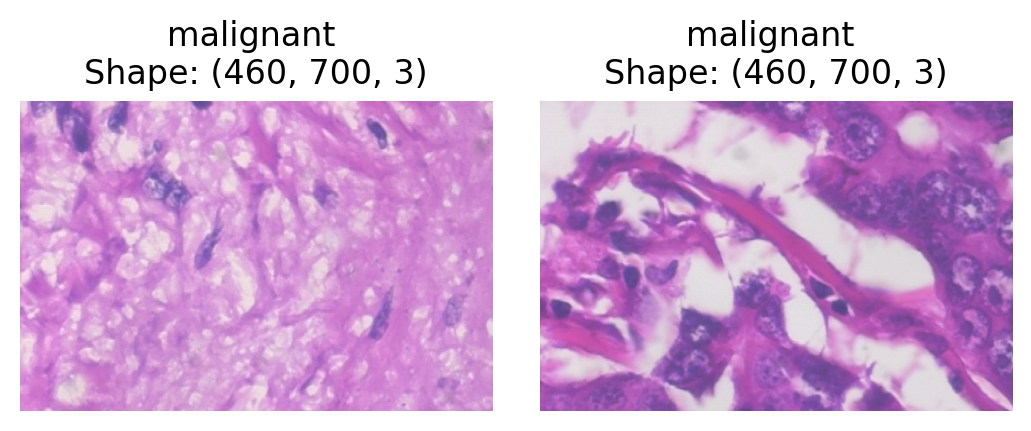

In [4]:
def show_images(image_dir):
    folder_name = os.path.basename(image_dir)

    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Select any 2 random images from the folder
    random_images = random.sample(image_files, 2)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, dpi=200)

    # Loop through the randomly selected images and display them
    for i, image_file in enumerate(random_images):
        image_path = os.path.join(image_dir, image_file)
        original_image = plt.imread(image_path)
        axes[i].imshow(original_image)
        axes[i].axis('off')
        axes[i].set_title(f'{folder_name} \nShape: {original_image.shape}')


    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)

    # Show the plot
    plt.show()

# Example usage
image_directory = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast/malignant"
show_images(image_directory)

In [5]:
import os
import matplotlib.pyplot as plt

def check_image_sizes(image_dir):
    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Initialize a variable to store the size of the first image
    first_image_size = None
    all_same_size = True

    # Loop through the images to check their sizes
    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        image = plt.imread(image_path)

        # Get the current image size
        current_image_size = image.shape

        # Set the size for the first image
        if first_image_size is None:
            first_image_size = current_image_size
        else:
            # Check if the current image size is different from the first image size
            if current_image_size != first_image_size:
                all_same_size = False
                print(f"Image {image_file} has a different size: {current_image_size}")

    if all_same_size:
        print("All images have the same size:", first_image_size)
    else:
        print("Not all images have the same size.")

# Example usage
image_directory1 = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast/benign"
image_directory2 = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast/malignant"
check_image_sizes(image_directory1)
check_image_sizes(image_directory2)


All images have the same size: (460, 700, 3)
Image SOB_M_PC-14-12465-400-003.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-002.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-001.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-009.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-007.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-010.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-005.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-008.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-006.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-004.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-013.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-011.png has a different size: (456, 700, 3)
Image SOB_M_PC-14-12465-400-012.png has a different size: (456, 700, 3)
Not all images have

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

def augment_and_resize(image_dir, output_dir, target_size=(224, 224)):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Create a temporary directory structure needed for flow_from_directory
    temp_dir = os.path.join(output_dir, 'temp_class')
    if not os.path.exists(temp_dir):
        os.makedirs(temp_dir)

    # Move all images from the source directory into the temporary class directory
    for image_file in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_file)
        if os.path.isfile(image_path):  # Ensure it's an image file, not a directory
            shutil.copy(image_path, temp_dir)  # Copy image to temp_class folder

    # Create an instance of ImageDataGenerator with resizing
    datagen = ImageDataGenerator(rescale=1./255)  # Normalizing pixel values

    # Flow from directory to read images, resize them, and save
    generator = datagen.flow_from_directory(
        directory=output_dir,    # The temp directory with 'temp_class'
        target_size=target_size,  # Resize all images to target_size (224x224)
        batch_size=1,            # Process one image at a time
        class_mode=None,         # No class labels needed since we are just resizing
        shuffle=False,           # No need to shuffle images
        save_to_dir=output_dir,  # Output directory to save resized images
        save_format='png'        # Save format
    )

    # Loop over all images to ensure each is processed
    total_images = generator.samples
    for i in range(total_images):
        next(generator)  # This will process each image

    # Remove the temporary directory after processing
    shutil.rmtree(temp_dir)
    print(f"All images resized to {target_size} and saved to {output_dir}")

# Main function to handle the directories
def process_all_directories():
    benign_dir = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast/benign"
    malignant_dir = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast/malignant"

    output_benign_dir = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/benign"
    output_malignant_dir = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/malignant"

    # Resize images in both the benign and malignant directories
    augment_and_resize(benign_dir, output_benign_dir)
    augment_and_resize(malignant_dir, output_malignant_dir)

# Run the function to process all directories
process_all_directories()


Found 588 images belonging to 1 classes.
All images resized to (224, 224) and saved to /content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/benign
Found 1232 images belonging to 1 classes.
All images resized to (224, 224) and saved to /content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/malignant


In [7]:
import os
from PIL import Image

def count_images_in_directory(directory):
    # List all files in the directory
    files = os.listdir(directory)

    # Filter for image files based on their extensions
    image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')  # Add other formats as needed
    image_files = [f for f in files if f.lower().endswith(image_extensions)]

    image_shapes = []  # List to store shapes of the images

    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        with Image.open(image_path) as img:
            # Get the shape (dimensions) of the image
            image_shapes.append(img.size)  # (width, height)

    return len(image_files), image_shapes

# Example usage
image_benign = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/benign"
image_malignant = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/malignant"

image_benign_count, benign_shapes = count_images_in_directory(image_benign)
image_malignant_count, malignant_shapes = count_images_in_directory(image_malignant)

print(f"Number of images in '{image_benign}': {image_benign_count}")
print("Shapes of benign images:", benign_shapes)

print(f"Number of images in '{image_malignant}': {image_malignant_count}")
print("Shapes of malignant images:", malignant_shapes)


Number of images in '/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/benign': 588
Shapes of benign images: [(224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224, 224), (224,

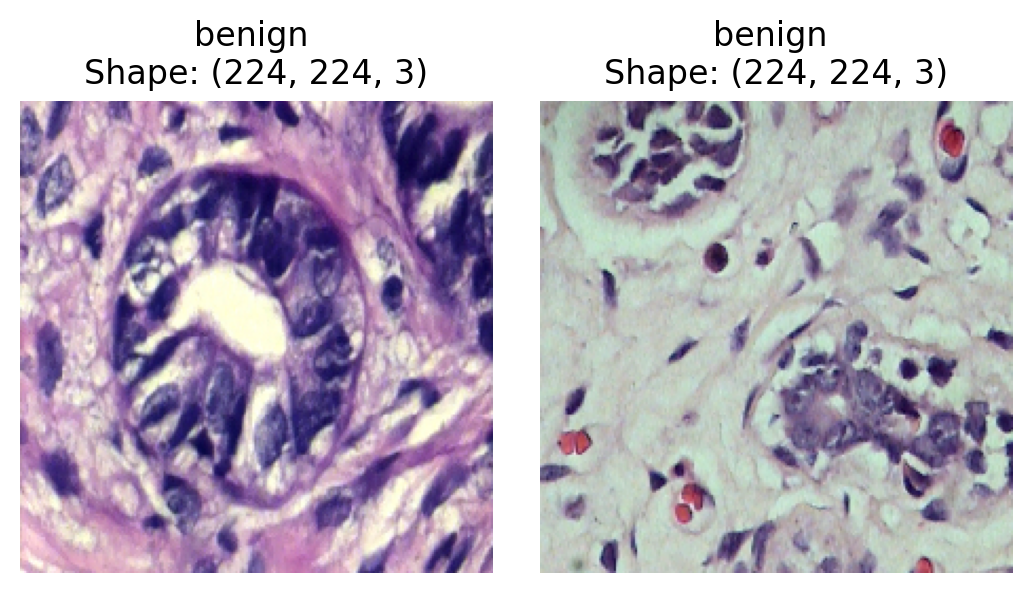

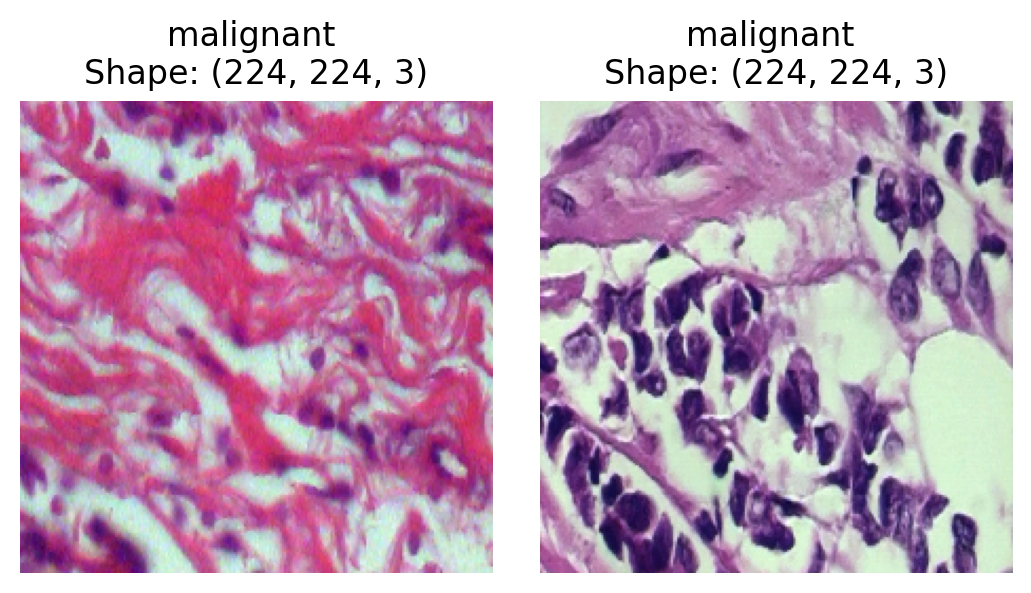

In [9]:
def show_images(image_dir):
    folder_name = os.path.basename(image_dir)

    # Get the list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Select any 2 random images from the folder
    random_images = random.sample(image_files, 2)

    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, dpi=200)

    # Loop through the randomly selected images and display them
    for i, image_file in enumerate(random_images):
        image_path = os.path.join(image_dir, image_file)
        original_image = plt.imread(image_path)
        axes[i].imshow(original_image)
        axes[i].axis('off')
        axes[i].set_title(f'{folder_name} \nShape: {original_image.shape}')


    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)

    # Show the plot
    plt.show()
# Example usage
image_directory1 = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/benign"
image_directory2 = "/content/drive/MyDrive/BreakHis/BreaKHis_v1/breast_resized/malignant"
show_images(image_directory1)
show_images(image_directory2)